## Lesson 12: Networked Programs

We take a quick look at how data moves across the network using the HyperText Transport Protocol (HTTP) and how we write programs to read data across the network.

While many of the examples in this book have focused on reading files and looking for data in those files, there are many different sources of information when one considers the Internet.

In this lesson we will pretend to be a web browser and retrieve web pages using the Hypertext Transfer Protocol (HTTP). Then we will read through the web page data and parse it.

Video: Networks and Packets - Part 1 

### <https://www.youtube.com/watch?v=RsnaRPC52G0>

## Hypertext Transfer Protocol - HTTP

Video: Networks and Packets - Part 2

### <https://www.youtube.com/watch?v=Bvx7vY454xw>  

The network protocol that powers the web is actually quite simple and there is built-in support in Python called `socket` which makes it very easy to make network connections and retrieve data over those sockets in a Python program.

A **socket** is much like a file, except that a single socket provides a two-way connection between two programs. You can both read from and write to the same socket. If you write something to a socket, it is sent to the application at the other end of the socket. If you read from the socket, you are given the data which the other application has sent.

But if you try to read a socket when the program on the other end of the socket has not sent any data, you just sit and wait. If the programs on both ends of the socket simply wait for some data without sending anything, they will wait for a very long time, so an important part of programs that communicate over the Internet is to have some sort of protocol.

A protocol is a set of precise rules that determine who is to go first, what they are to do, and then what the responses are to that message, and who sends next, and so on. In a sense the two applications at either end of the socket are doing a dance and making sure not to step on each other's toes.

There are many documents that describe these network protocols. The Hypertext Transfer Protocol is described in the following document:

<https://www.w3.org/Protocols/rfc2616/rfc2616.txt>

This is a long and complex 176-page document with a lot of detail. If you find it interesting, feel free to read it all. But if you take a look around page 36 of RFC2616 you will find the syntax for the GET request. To request a document from a web server, we make a connection, e.g. to the `www.pr4e.org` server on port 80, and then send a line of the form

`GET http://data.pr4e.org/romeo.txt HTTP/1.0`

where the second parameter is the web page we are requesting, and then we also send a blank line. The web server will respond with some header information about the document and a blank line followed by the document content.

Video: Networks and Packets - Part 3

### <https://www.youtube.com/watch?v=Lr9Vm-VghAk>

## The World's Simplest Web Browser

Perhaps the easiest way to show how the HTTP protocol works is to write a very simple Python program that makes a connection to a web server and follows the rules of the HTTP protocol to request a document and display what the server sends back.



In [6]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\n\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1: 
        break
    print(data.decode())
mysock.close()

HTTP/1.1 200 OK
Content-Type: text/plain
Content-Length: 167
Connection: close
Date: Tue, 22 Aug 2023 22:50:57 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already s
ick and pale with grief



First the program makes a connection to port 80 on the server <www.pr4e.com>. Since our program is playing the role of the "web browser", the HTTP protocol says we must send the GET command followed by a blank line. `\r\n` signifies an EOL (end of line), so `\r\n\r\n` signifies nothing between two EOL sequences. That is the equivalent of a blank line.



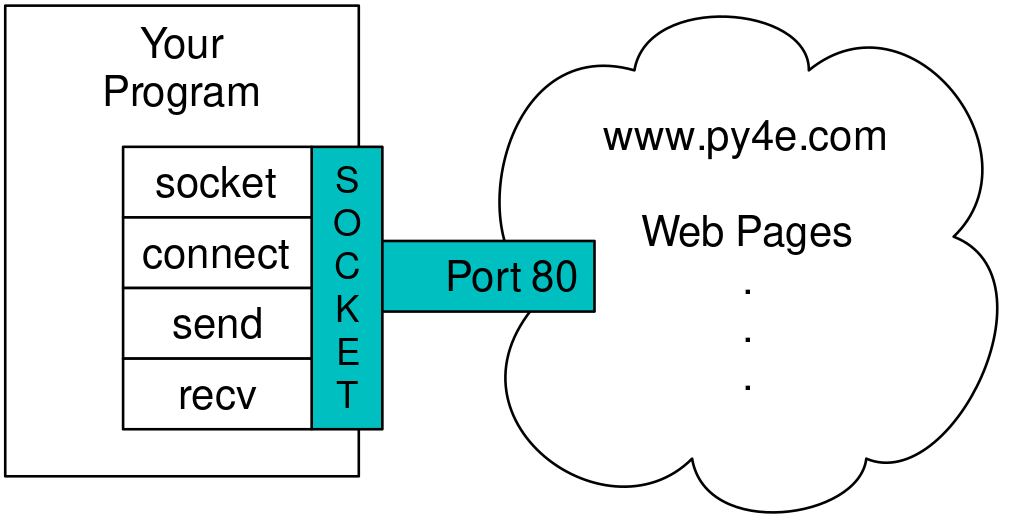
A Socket Connection

Once we send that blank line, we write a loop that receives data in 512-character chunks from the socket and prints the data out until there is no more data to read (i.e., the recv() returns an empty string).

The program produces the following output:

In [2]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end='')

mysock.close()

HTTP/1.1 200 OK
Content-Type: text/plain
Content-Length: 167
Connection: close
Date: Tue, 22 Aug 2023 23:30:53 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


The output starts with headers which the web server sends to describe the document. For example, the `Content-Type` header indicates that the document is a plain text document (`text/plain`).

After the server sends us the headers, it adds a blank line to indicate the end of the headers, and then sends the actual data of the file romeo.txt.

This example shows how to make a low-level network connection with sockets. Sockets can be used to communicate with a web server or with a mail server or many other kinds of servers. All that is needed is to find the document which describes the protocol and write the code to send and receive the data according to the protocol.

However, since the protocol that we use most commonly is the HTTP web protocol, Python has a special library specifically designed to support the HTTP protocol for the retrieval of documents and data over the web.

One of the requirements for using the HTTP protocol is the need to send and receive data as bytes objects, instead of strings. In the preceding example, the `encode()` and `decode()` methods convert strings into bytes objects and back again.

The next example uses `b''` notation to specify that a variable should be stored as a bytes object. `encode()` and `b''` are equivalent.

In [9]:
b'Hello world'

b'Hello world'

In [11]:
'Hello world'.encode()

b'Hello world'

## Retrieving an Image Over HTTP

Video: Networks and Packets - Part 4

<https://www.youtube.com/watch?v=-cmlmaVSONg>